# Machine Learning project
## in this project we create a pridector of get placement  on the bases of iq and cgpa for this we work on a toy data set.

## Steps


1.   frame the problem : creating a pridector of get placed
2.   gathering data : create a toy dataset
3.   cleaning : No need
4.   preprocessing: No need
5.   EDA:
6.   Feature Selection:
7.   Extract input and output cols
8.   Scale the Values
9.   Train test split
10.  train the model
11.  Evaluate the Model/ Model Selection
12.  deploy the model












In [63]:
import numpy as np
import pandas as pd

# Data gathering step
### we create a dummy dataset for our this project




In [64]:
# creating iq column
iq = np.random.random_integers(1,200,size=100)
iq

<ipython-input-64-12bd5d7d451a>:2: DeprecationWarning: This function is deprecated. Please call randint(1, 200 + 1) instead
  iq = np.random.random_integers(1,200,size=100)


array([189,  74, 186,  47,  45, 190,  97,  38,  55,  79, 185,  26, 179,
       160,  75,   1,  82,  58, 156,   5,  49,  15,  98, 148,  72, 106,
        25,  12,  49, 158, 127, 124, 165, 195,  36, 107, 190, 116, 148,
       167, 107,  64,  54, 169,  41, 176,  86,  45, 139,  74, 176, 147,
       101,  19, 141, 118,  39,  29,   2,  62, 106,  28,  14,  73, 166,
       156,  28,  34,  56, 161, 109, 102, 103, 193,  71,  10, 110,  21,
       130,  73,  60, 118,  82, 166, 180, 190, 165,  49, 117,  62, 176,
        24, 187, 163,  65,  88,  72, 115, 119, 119])

In [65]:
# creating cgpa column
cgpa = np.random.random_integers(1,10,size = 100)
cgpa

<ipython-input-65-9fc01a1cae65>:2: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  cgpa = np.random.random_integers(1,10,size = 100)


array([ 2,  6,  3,  8,  1,  4, 10,  2,  9,  1,  2,  7,  8,  6,  6,  5,  8,
        2,  9,  7, 10,  5,  5,  3,  6,  1,  6,  4,  1,  5,  1,  5,  8,  7,
       10,  2,  3,  7,  6,  2,  1,  1,  4,  3,  7,  6,  1, 10,  9,  8,  5,
        7,  1,  6,  8, 10,  1,  5,  9,  5,  6,  4,  8,  1, 10,  3,  3,  2,
        2,  2, 10, 10,  6, 10,  5,  2, 10,  6,  9,  5,  7,  4,  8,  9,  8,
        2, 10,  7,  4,  4,  6,  7,  4,  2,  6,  7,  8,  5,  6,  3])

In [66]:
# creating data frame
df = pd.DataFrame({'iq':iq,'cgpa':cgpa})

In [67]:
df[df['cgpa']>5].shape

(51, 2)

In [68]:
# creating a function for get placed or not
def get_placed(cgpa):
  if cgpa>6:
    return 1
  else:
    return 0

In [69]:
df['placed'] = df['cgpa'].apply(get_placed)

In [70]:
# final data frame
df

,iq,cgpa,placed
0,189,2,0
1,74,6,0
2,186,3,0
3,47,8,1
4,45,1,0
...,...,...,...
95,88,7,1
96,72,8,1
97,115,5,0
98,119,6,0


# Preprocessing + EDA + Feature selection

In [71]:
# preprocessing -> there is no need of preprocessing
df.head()

,iq,cgpa,placed
0,189,2,0
1,74,6,0
2,186,3,0
3,47,8,1
4,45,1,0


In [72]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   iq      100 non-null    int64
 1   cgpa    100 non-null    int64
 2   placed  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


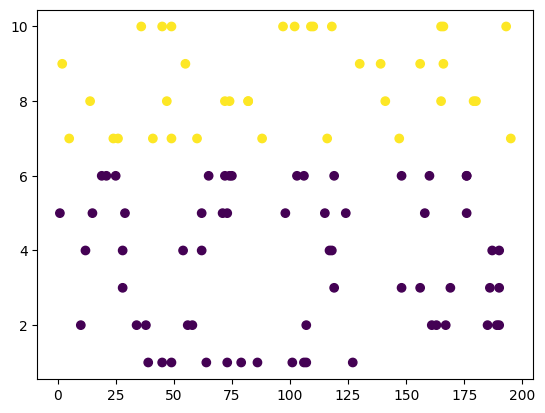

In [73]:
import matplotlib.pyplot as plt
plt.scatter(data = df , x = 'iq' , y = 'cgpa' , c = 'placed' )

In [74]:
# Feature selection -> No Need

In [75]:
# extracting input and output cols

input = df.iloc[: , 0:2]
output = df.iloc[:,-1]
output

0     0
1     0
2     0
3     1
4     0
     ..
95    1
96    1
97    0
98    0
99    0
Name: placed, Length: 100, dtype: int64

In [76]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.1)

In [77]:
x_train
y_train
x_test

,iq,cgpa
21,15,5
58,2,9
45,176,6
10,185,2
12,179,8
39,167,2
94,65,6
56,39,1
55,118,10
71,102,10


In [78]:
# Scale the Values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [79]:
scaler.transform([[100,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.03265401, 1.65053731]])

In [80]:
# train model using linearRegression
# model training
from sklearn.linear_model import LogisticRegression


In [81]:
clf = LogisticRegression()

In [82]:
clf.fit(x_train,y_train)

LogisticRegression()

In [83]:
# evalution
# machine pridiction
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [84]:
# actual result
y_test

21    0
58    1
45    0
10    0
12    1
39    0
94    0
56    0
55    1
71    1
Name: placed, dtype: int64

In [85]:
from sklearn.metrics import accuracy_score


In [86]:
accuracy_score(y_test,y_pred)

1.0

<Axes: >

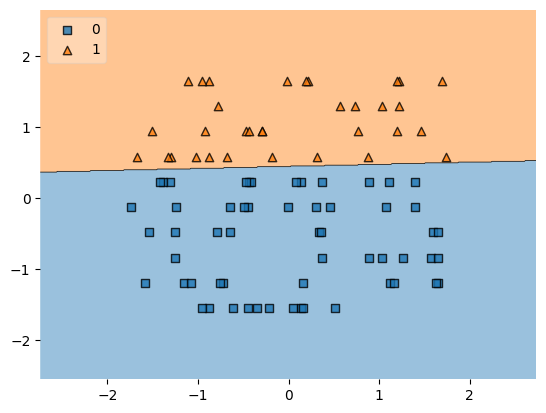

In [87]:
# how to drow machine learning decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [88]:
# model deployment
import pickle

In [89]:
#pickle.dump(clf,open('mode1.pkl','wb'))

In [90]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)